In [1]:
from algorithm import GraphWrapper
from pathlib import Path
from tqdm import tqdm

input_path = Path('../benign_graphs/tc3-theia/firefox/nd')
input_paths = list(input_path.glob('*.json'))[:200]
input_graphs = [GraphWrapper(input_path) 
                for input_path in tqdm(input_paths, desc='Reading graphs')]
nx_graphs = [graph.to_nx() for graph in tqdm(input_graphs, desc='Converting to nx')]


Converting to nx: 100%|██████████| 200/200 [00:03<00:00, 60.21it/s]


In [2]:
import networkx as nx
from karateclub import Graph2Vec

graph2vec = Graph2Vec(
    wl_iterations=80,
    attributed=True,
    dimensions=128,
    workers=4,
    epochs=5
)

graph2vec.fit(nx_graphs)

In [4]:
len(graph2vec.get_embedding())

200

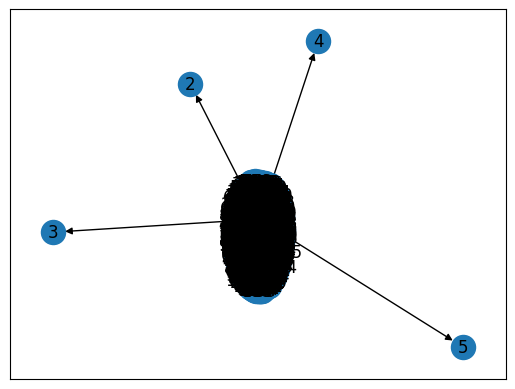

In [11]:
import matplotlib.pyplot as plt
nx.draw_networkx(G, with_labels=True)
plt.show() 